[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DeePTB-Lab/Recipes/blob/main/deeptb_tutorials/v2.2/DeePTB_Tutorial_2_1_Colab.ipynb)
[![GitHub](https://img.shields.io/badge/GitHub-DeePTB-blue)](https://github.com/deepmodeling/DeePTB)

---

## 🚀 Installation & Setup

This cell will automatically:
- Detect your environment (Colab/Binder/Local)
- Install DeePTB and all dependencies
- Download tutorial data files

> **💡 First-time setup takes 5-7 minutes. Please be patient!**

In [ ]:
# Download and run the installation script
import os
from pathlib import Path

# Check if we're in Colab/Binder
IN_COLAB = 'google.colab' in __import__('sys').modules
IN_BINDER = 'BINDER_SERVICE_HOST' in os.environ

if IN_COLAB or IN_BINDER:
    # Download the installation script
    if not Path('install_deeptb.py').exists():
        !wget -q https://raw.githubusercontent.com/DeePTB-Lab/Recipes/main/scripts/install_deeptb.py
    
    # Run the installation script
    %run install_deeptb.py
else:
    print("💻 Running locally - please ensure DeePTB is installed")
    print("See: https://github.com/deepmodeling/DeePTB#installation")

# DeePTB Tutorial 2.1: push to orthogonal basis [v2.2]

**这里忽略全部的数据准备的过程，但要求首先学会前面的如何准备数据，如何进行训练。**

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
current_dir = os.getcwd()
workdir=f'{current_dir}/data/GaAs_io_sk/'
os.chdir(f"{workdir}")
!tree -L 1 ./data/vasp_ase

./data/vasp_ase
├── AsGa.0
├── processed_dataset_22915fbb7a750e40346716ff89f45ffe8cc73ea3
├── processed_dataset_29125ef76aff8d3f873b554ba4df38fa6a970d24
├── processed_dataset_83df010bc9b7d236db9ac076317a10063f93b273
└── processed_dataset_c60d525842b112a59728a159f43f33238a8c4e7d

6 directories, 0 files


## 修改input.json

```json
    "model_options": {
        "nnsk": {
            ...
            "soc": {},
            "freeze": [
                "overlap"
            ],
            "push": false,
            ...
        }
    }
```

修改为：

```json
    "model_options": {
        "nnsk": {
            ...
            "soc": {},
            "freeze": [
                "overlap"
            ],
            "push": {"ovp_thr":-0.01, "period":20},
            ...
        }
    }
```
另外，此时我设置了`num_epoch`:2000; 因为这个训练集中只有一个结构，epoch 2000 意味着训练forward被调用了2000次。

period = 2, 因此，每调用2次会push一次参数，这里的overlap的系数，实现 alpha = 1- n_calls/period * ovp_thr

矩阵 S = I + alpha * F 。其中I是单位矩阵，F是初始的overlap矩阵的非对角块。当alpha=1时，S就是初始的overlap矩阵。

当 alpha=0 时，S就是单位矩阵。


**注意几个参数**
1. `ovp_thr`: 这个参数确定alpha的下降步长。一般不要太大。在能接受的时间范围内越小越好。
2. `period`: period, 不要太小，每个S= I + alpha * F 最好是保证能够训练一定的步数。当然如果ovp_thr足够小，也可以很小 period。因为相当于每一步下降很少，因此可以下降的更频繁一些。
3. `gamma`:"lr_scheduler": {"gamma": } gamma 不要太小，decay 太快，到后面的步的时候，lr太小，导致在此时的 S 下网络已经没有能力（足够的lr)训练更高的精度。
最后的lr = lr * gamma ** num_epoch, 估计一下，不要让最后的lr太小。
4. `num_epoch` 的设置要满足：num_epoch * batch_size / period * ovp_thr >= 1, 否则无法完全正交。


In [4]:
os.chdir(f"{workdir}/train")

!dptb train input_push.json -i sktb.json -o nnsk_push


TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.
 
 
#################################################################################
#                                                                               #
#                                                                               #
#      ██████████                     ███████████  ███████████ ███████████      #
#     ░░███░░░░███                   ░░███░░░░░███░█░░░███░░░█░░███░░░░░███     #
#      ░███   ░░███  ██████   ██████  ░███    ░███░   ░███  ░  ░███    ░███     #
#      ░███    ░███ ███░░███ ███░░███ ░██████████     ░███     ░██████████      #
#      ░███    ░███░███████ ░███████  ░███░░░░░░      ░███     ░███░░░░░███     #
#      ░███    ███ ░███░░░  ░███░░░   ░███            ░███     ░███    ░███     #
#      ██████████  ░░██████ ░░██████  █████           █████    ███████████      #
#     ░░░░░░░░░░    ░░░░░░   ░░░░░░  ░░░░░           ░░░░░    ░░░░░░░░░░░       #
#         

TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.
 
 
#################################################################################
#                                                                               #
#                                                                               #
#      ██████████                     ███████████  ███████████ ███████████      #
#     ░░███░░░░███                   ░░███░░░░░███░█░░░███░░░█░░███░░░░░███     #
#      ░███   ░░███  ██████   ██████  ░███    ░███░   ░███  ░  ░███    ░███     #
#      ░███    ░███ ███░░███ ███░░███ ░██████████     ░███     ░██████████      #
#      ░███    ░███░███████ ░███████  ░███░░░░░░      ░███     ░███░░░░░███     #
#      ░███    ███ ░███░░░  ░███░░░   ░███            ░███     ░███    ░███     #
#      ██████████  ░░██████ ░░██████  █████           █████    ███████████      #
#     ░░░░░░░░░░    ░░░░░░   ░░░░░░  ░░░░░           ░░░░░    ░░░░░░░░░░░       #
#         

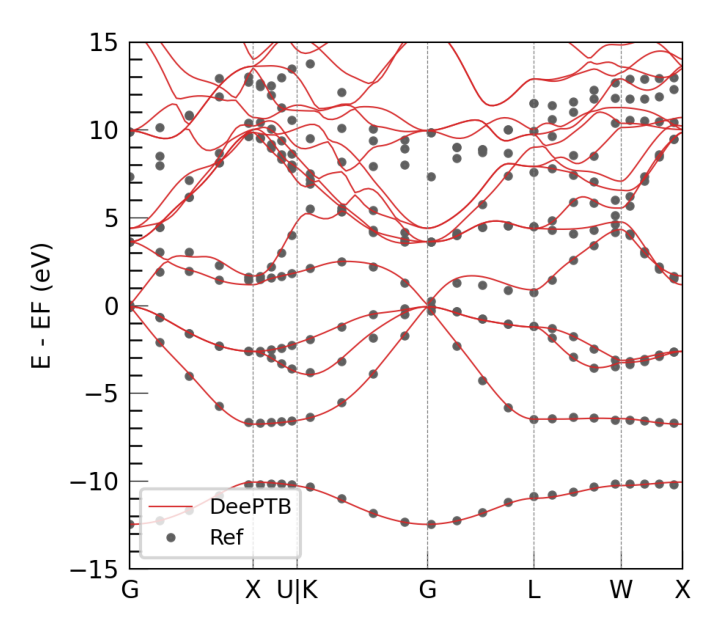

In [6]:
!dptb run band.json -i ./nnsk_push/checkpoint/nnsk.iter_ovp0.000.pth -o band_push
# !dptb run band.json -i ./ref_ckpt/nnsk_tr1.pth -o band_train

# display the band plot:
image_path = f'./band_push/results/band.png'
img = mpimg.imread(image_path)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

In [9]:
# 我们将训练的结果转换成无overlap的存档文件。
!dptb p2j -i ./nnsk_push/checkpoint/nnsk.iter_ovp0.000.pth -dels -o orth_ckpt

TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.
 
 
#################################################################################
#                                                                               #
#                                                                               #
#      ██████████                     ███████████  ███████████ ███████████      #
#     ░░███░░░░███                   ░░███░░░░░███░█░░░███░░░█░░███░░░░░███     #
#      ░███   ░░███  ██████   ██████  ░███    ░███░   ░███  ░  ░███    ░███     #
#      ░███    ░███ ███░░███ ███░░███ ░██████████     ░███     ░██████████      #
#      ░███    ░███░███████ ░███████  ░███░░░░░░      ░███     ░███░░░░░███     #
#      ░███    ███ ░███░░░  ░███░░░   ░███            ░███     ░███    ░███     #
#      ██████████  ░░██████ ░░██████  █████           █████    ███████████      #
#     ░░░░░░░░░░    ░░░░░░   ░░░░░░  ░░░░░           ░░░░░    ░░░░░░░░░░░       #
#         

TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.
 
 
#################################################################################
#                                                                               #
#                                                                               #
#      ██████████                     ███████████  ███████████ ███████████      #
#     ░░███░░░░███                   ░░███░░░░░███░█░░░███░░░█░░███░░░░░███     #
#      ░███   ░░███  ██████   ██████  ░███    ░███░   ░███  ░  ░███    ░███     #
#      ░███    ░███ ███░░███ ███░░███ ░██████████     ░███     ░██████████      #
#      ░███    ░███░███████ ░███████  ░███░░░░░░      ░███     ░███░░░░░███     #
#      ░███    ███ ░███░░░  ░███░░░   ░███            ░███     ░███    ░███     #
#      ██████████  ░░██████ ░░██████  █████           █████    ███████████      #
#     ░░░░░░░░░░    ░░░░░░   ░░░░░░  ░░░░░           ░░░░░    ░░░░░░░░░░░       #
#         

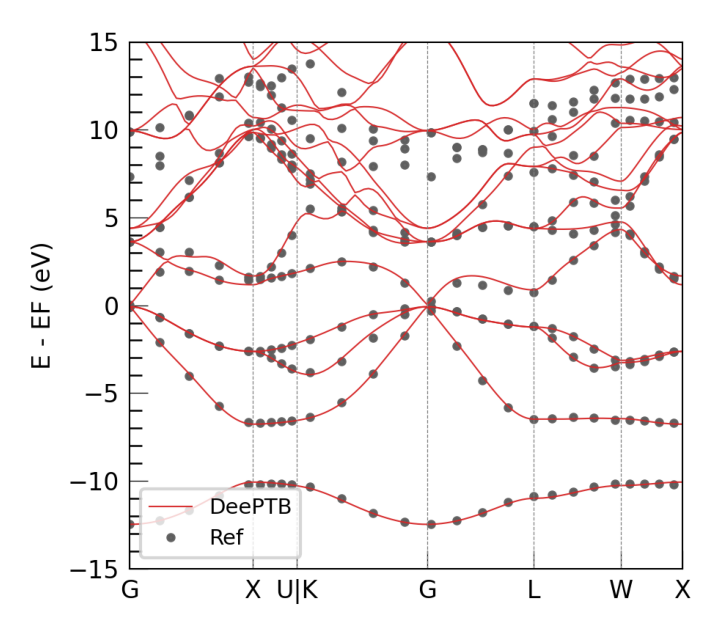

In [10]:
# 现在展示加载无overlap的json文件的band图。
!dptb run band.json -i ./orth_ckpt/ckpt.json -o band_orth
# !dptb run band.json -i ./ref_ckpt/nnsk_tr1.pth -o band_train

# display the band plot:
image_path = f'./band_orth/results/band.png'
img = mpimg.imread(image_path)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

In [16]:
# 进一步，我们可以加载无overlap的json文件，进行进一步的训练。
# 这里我们可以基于无overlap的存档，生成输入文件。
!dptb config ./ -m orth_ckpt/ckpt.json -sk -tr

TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.
 
 
#################################################################################
#                                                                               #
#                                                                               #
#      ██████████                     ███████████  ███████████ ███████████      #
#     ░░███░░░░███                   ░░███░░░░░███░█░░░███░░░█░░███░░░░░███     #
#      ░███   ░░███  ██████   ██████  ░███    ░███░   ░███  ░  ░███    ░███     #
#      ░███    ░███ ███░░███ ███░░███ ░██████████     ░███     ░██████████      #
#      ░███    ░███░███████ ░███████  ░███░░░░░░      ░███     ░███░░░░░███     #
#      ░███    ███ ░███░░░  ░███░░░   ░███            ░███     ░███    ░███     #
#      ██████████  ░░██████ ░░██████  █████           █████    ███████████      #
#     ░░░░░░░░░░    ░░░░░░   ░░░░░░  ░░░░░           ░░░░░    ░░░░░░░░░░░       #
#         

In [17]:
# 此时，我们可以在输入文件中修改参数，比如data的位置，比如训练的epoch lr decay 等等。
# 但你一定要注意的是overlap的相关参数，是否为false, push 是否为false。 freeze 也不需要对overlap的参数进行冻结。

In [19]:
os.chdir(f"{workdir}/train")

!dptb train input_orth.json -i orth_ckpt/ckpt.json -o nnsk_orth

TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.
 
 
#################################################################################
#                                                                               #
#                                                                               #
#      ██████████                     ███████████  ███████████ ███████████      #
#     ░░███░░░░███                   ░░███░░░░░███░█░░░███░░░█░░███░░░░░███     #
#      ░███   ░░███  ██████   ██████  ░███    ░███░   ░███  ░  ░███    ░███     #
#      ░███    ░███ ███░░███ ███░░███ ░██████████     ░███     ░██████████      #
#      ░███    ░███░███████ ░███████  ░███░░░░░░      ░███     ░███░░░░░███     #
#      ░███    ███ ░███░░░  ░███░░░   ░███            ░███     ░███    ░███     #
#      ██████████  ░░██████ ░░██████  █████           █████    ███████████      #
#     ░░░░░░░░░░    ░░░░░░   ░░░░░░  ░░░░░           ░░░░░    ░░░░░░░░░░░       #
#         

TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.
 
 
#################################################################################
#                                                                               #
#                                                                               #
#      ██████████                     ███████████  ███████████ ███████████      #
#     ░░███░░░░███                   ░░███░░░░░███░█░░░███░░░█░░███░░░░░███     #
#      ░███   ░░███  ██████   ██████  ░███    ░███░   ░███  ░  ░███    ░███     #
#      ░███    ░███ ███░░███ ███░░███ ░██████████     ░███     ░██████████      #
#      ░███    ░███░███████ ░███████  ░███░░░░░░      ░███     ░███░░░░░███     #
#      ░███    ███ ░███░░░  ░███░░░   ░███            ░███     ░███    ░███     #
#      ██████████  ░░██████ ░░██████  █████           █████    ███████████      #
#     ░░░░░░░░░░    ░░░░░░   ░░░░░░  ░░░░░           ░░░░░    ░░░░░░░░░░░       #
#         

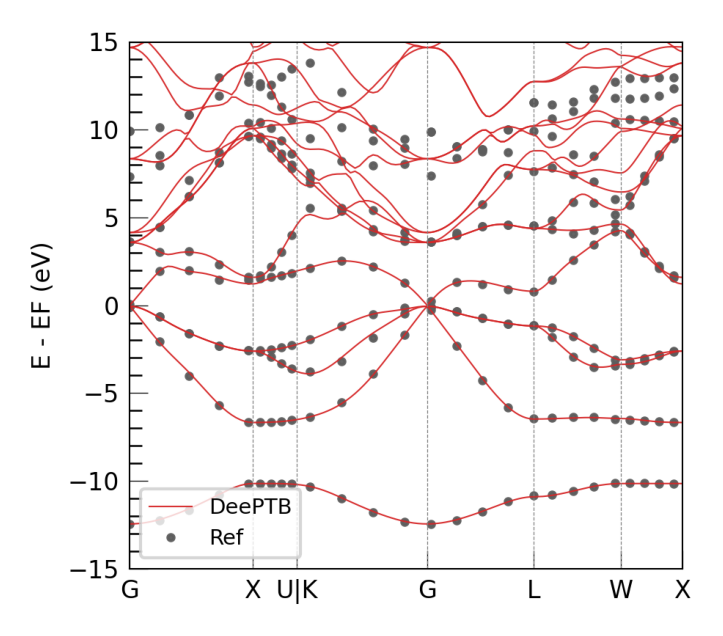

In [20]:
# 现在展示加载无overlap的json文件的band图。
!dptb run band.json -i ./nnsk_orth/checkpoint/nnsk.best.pth -o band_orth
# !dptb run band.json -i ./ref_ckpt/nnsk_tr1.pth -o band_train

# display the band plot:
image_path = f'./band_orth/results/band.png'
img = mpimg.imread(image_path)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()